In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import caffe
import score

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

# load image, switch to BGR, subtract mean, and make dims C x H x W for Caffe
im = Image.open('/home/cv/grayson/me.jpeg')
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ -= np.array((104.00698793,116.66876762,122.67891434))
in_ = in_.transpose((2,0,1))

# load net
net = caffe.Net('model/deploy.prototxt',
                'snapshot/train_iter_176000.caffemodel', 
                caffe.TEST)

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_

# must do forward pass or else blobs and deconv params will be all zeroes
net.forward()    

{'loss': array([[[[  9.52990055e-01,   9.59868193e-01,   9.65726316e-01, ...,
             9.95139360e-01,   9.95259106e-01,   9.95375216e-01],
          [  9.59868193e-01,   9.66001928e-01,   9.71189439e-01, ...,
             9.96307254e-01,   9.96402502e-01,   9.96495187e-01],
          [  9.65726316e-01,   9.71189439e-01,   9.75775898e-01, ...,
             9.97193635e-01,   9.97269452e-01,   9.97343361e-01],
          ..., 
          [  9.74929094e-01,   9.79347289e-01,   9.82977748e-01, ...,
             9.95984077e-01,   9.96055007e-01,   9.96124685e-01],
          [  9.70539093e-01,   9.75542605e-01,   9.79684949e-01, ...,
             9.94922101e-01,   9.95007992e-01,   9.95092511e-01],
          [  9.65361238e-01,   9.71023262e-01,   9.75743890e-01, ...,
             9.93579984e-01,   9.93683815e-01,   9.93785858e-01]],
 
         [[  4.46981378e-02,   3.84830236e-02,   3.30954380e-02, ...,
             4.80557326e-03,   4.68798680e-03,   4.57326602e-03],
          [  3.848302

In [3]:
#solver = caffe.SGDSolver('solver.prototxt')
#val = np.loadtxt('/home/cv/hdl/caffe/data/pascal/VOC/VOC2010/ImageSets/person/head_val.txt', dtype=str)

In [4]:
#hist, loss = score.compute_hist(solver.test_nets[0], 'segmentation_results', val, layer='score', gt='label' )

In [5]:
net.blobs['score'].channels

7

In [6]:
# blobs
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 600, 480)),
 ('data_input_0_split_0', (1, 3, 600, 480)),
 ('data_input_0_split_1', (1, 3, 600, 480)),
 ('conv1_1', (1, 64, 798, 678)),
 ('conv1_2', (1, 64, 798, 678)),
 ('pool1', (1, 64, 399, 339)),
 ('conv2_1', (1, 128, 399, 339)),
 ('conv2_2', (1, 128, 399, 339)),
 ('pool2', (1, 128, 200, 170)),
 ('conv3_1', (1, 256, 200, 170)),
 ('conv3_2', (1, 256, 200, 170)),
 ('conv3_3', (1, 256, 200, 170)),
 ('pool3', (1, 256, 100, 85)),
 ('conv4_1', (1, 512, 100, 85)),
 ('conv4_2', (1, 512, 100, 85)),
 ('conv4_3', (1, 512, 100, 85)),
 ('pool4', (1, 512, 50, 43)),
 ('conv5_1', (1, 512, 50, 43)),
 ('conv5_2', (1, 512, 50, 43)),
 ('conv5_3', (1, 512, 50, 43)),
 ('pool5', (1, 512, 25, 22)),
 ('fc6', (1, 4096, 19, 16)),
 ('fc7', (1, 4096, 19, 16)),
 ('score_fr', (1, 7, 19, 16)),
 ('upscore', (1, 7, 640, 544)),
 ('score', (1, 7, 600, 480)),
 ('loss', (1, 7, 600, 480))]

In [7]:
# parameters
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1_1', (64, 3, 3, 3)),
 ('conv1_2', (64, 64, 3, 3)),
 ('conv2_1', (128, 64, 3, 3)),
 ('conv2_2', (128, 128, 3, 3)),
 ('conv3_1', (256, 128, 3, 3)),
 ('conv3_2', (256, 256, 3, 3)),
 ('conv3_3', (256, 256, 3, 3)),
 ('conv4_1', (512, 256, 3, 3)),
 ('conv4_2', (512, 512, 3, 3)),
 ('conv4_3', (512, 512, 3, 3)),
 ('conv5_1', (512, 512, 3, 3)),
 ('conv5_2', (512, 512, 3, 3)),
 ('conv5_3', (512, 512, 3, 3)),
 ('fc6', (4096, 512, 7, 7)),
 ('fc7', (4096, 4096, 1, 1)),
 ('score_fr', (7, 4096, 1, 1)),
 ('upscore', (7, 7, 64, 64))]

In [8]:
# conv layer weights (edge_detectors)
print net.params['conv1_1'][0].data

[[[[ 0.12225891 -0.05260488 -0.33880869]
   [-0.18465658  0.12524171  0.12864633]
   [-0.19468638 -0.14015222 -0.31421736]]

  [[ 0.04810847  0.15010151 -0.21108781]
   [-0.04445705  0.30175459  0.18481244]
   [ 0.12489526  0.16775681 -0.02421443]]

  [[ 0.2938765  -0.03599101 -0.15765409]
   [-0.291145    0.18684682  0.035102  ]
   [ 0.27863544 -0.03711778 -0.22103508]]]


 [[[ 0.27613807 -0.14238602  0.21381964]
   [-0.16580915 -0.11573206 -0.11467097]
   [-0.10706066 -0.15308881 -0.23549868]]

  [[-0.2223582   0.03495511 -0.02208375]
   [-0.14486223 -0.13920911 -0.31491008]
   [-0.20833905  0.17751266  0.1072474 ]]

  [[ 0.04865579 -0.28051463  0.05019362]
   [ 0.10583514 -0.08425384  0.03525819]
   [ 0.32041001 -0.15048195  0.11902174]]]


 [[[ 0.25567275  0.000537   -0.1867601 ]
   [-0.19948551 -0.0987493   0.1312246 ]
   [-0.29574054 -0.18814111 -0.10544148]]

  [[ 0.24932873 -0.16382287  0.17432028]
   [-0.28649172 -0.18529622  0.25556219]
   [ 0.01698783  0.27166224 -0.29968429

In [9]:
# deconv layer weights
print net.params['upscore'][0].data

[[[[ 0.00024414  0.00073242  0.0012207  ...,  0.0012207   0.00073242
     0.00024414]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   ..., 
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.00024414  0.00073242  0.0012207  ...,  0.0012207   0.00073242
     0.00024414]]

  [[ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   ..., 
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.      

In [10]:
# data blob
print net.blobs['data'].data

[[[[  87.99301147   88.99301147   88.99301147 ...,  -98.00698853
     -94.00698853  -91.00698853]
   [  87.99301147   88.99301147   88.99301147 ...,  -96.00698853
     -89.00698853  -83.00698853]
   [  87.99301147   88.99301147   88.99301147 ...,  -77.00698853
     -67.00698853  -61.00698853]
   ..., 
   [ -77.00698853  -76.00698853  -80.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]
   [ -75.00698853  -73.00698853  -76.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]
   [ -74.00698853  -70.00698853  -72.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]]

  [[  75.33123016   76.33123016   76.33123016 ..., -110.66876984
    -106.66876984 -103.66876984]
   [  75.33123016   76.33123016   76.33123016 ..., -108.66876984
    -101.66876984  -95.66876984]
   [  75.33123016   76.33123016   76.33123016 ...,  -89.66876984
     -79.66876984  -73.66876984]
   ..., 
   [ -89.66876984  -88.66876984  -92.66876984 ..., -105.66876984
    -106.66876984 -107.66876984]


In [11]:
# conv1_1 blob
print net.blobs['conv1_1'].data

[[[[ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]
   [ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]
   [ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]
   ..., 
   [ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]
   [ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]
   [ 0.00307218  0.00307218  0.00307218 ...,  0.00307218  0.00307218
     0.00307218]]

  [[ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   ..., 
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.      

In [12]:
# pool1 blob
print net.blobs['pool1'].data

[[[[ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   ..., 
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]
   [ 0.          0.          0.         ...,  0.          0.          0.        ]]

  [[ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
     0.001502  ]
   [ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
     0.001502  ]
   [ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
     0.001502  ]
   ..., 
   [ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
     0.001502  ]
   [ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
     0.001502  ]
   [ 0.001502    0.001502    0.001502   ...,  0.001502    0.001502
 

In [13]:
# upscore blob
print net.blobs['upscore'].data.shape
print net.blobs['upscore'].data

(1, 7, 640, 544)
[[[[ 0.00428748  0.01286245  0.02143742 ...,  0.02182221  0.01309333
     0.00436444]
   [ 0.01286245  0.03858736  0.06431227 ...,  0.06546663  0.03927998
     0.01309333]
   [ 0.02143742  0.06431227  0.10718711 ...,  0.10911106  0.06546663
     0.02182221]
   ..., 
   [ 0.01990525  0.05971574  0.09952624 ...,  0.1028866   0.06173196
     0.02057732]
   [ 0.01194315  0.03582945  0.05971574 ...,  0.06173196  0.03703918
     0.01234639]
   [ 0.00398105  0.01194315  0.01990525 ...,  0.02057732  0.01234639
     0.00411546]]

  [[ 0.00227587  0.0068276   0.01137933 ...,  0.010366    0.0062196
     0.0020732 ]
   [ 0.0068276   0.02048279  0.03413798 ...,  0.031098    0.0186588
     0.0062196 ]
   [ 0.01137933  0.03413798  0.05689664 ...,  0.05183     0.031098
     0.010366  ]
   ..., 
   [ 0.00978222  0.02934666  0.0489111  ...,  0.05473468  0.03284081
     0.01094694]
   [ 0.00586933  0.017608    0.02934666 ...,  0.03284081  0.01970448
     0.00656816]
   [ 0.00195644  0.00

(7, 600, 480)
Image size: (600, 480)
Detected object classes: [0 1]


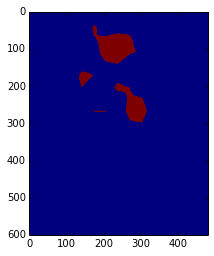

In [14]:
higher_level_filter = net.params['fc7'][0].data         # weights
# Recall: blob dimensions are N x C x H x W
print net.blobs['score'].data[0].shape
out = net.blobs['score'].data[0].argmax(axis=0)
imgplot = plt.imshow(out)
print 'Image size:', out.shape
print 'Detected object classes:', np.unique(out)